In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow datasets ipywidgets

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [6]:
#bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
gpus

[]

In [11]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [19]:
ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Project1', validation_split=0.2, subset='training', seed = 100)

Found 58 files belonging to 2 classes.
Using 47 files for training.


In [20]:
type(ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [27]:
ds.as_numpy_iterator().next()

(array([[[[ 87.,  87.,  87.],
          [ 87.,  87.,  87.],
          [ 88.,  88.,  88.],
          ...,
          [105., 105., 105.],
          [104., 104., 104.],
          [113., 113., 113.]],
 
         [[ 90.,  90.,  90.],
          [ 91.,  91.,  91.],
          [ 91.,  91.,  91.],
          ...,
          [106., 106., 106.],
          [109., 109., 109.],
          [110., 110., 110.]],
 
         [[ 93.,  93.,  93.],
          [ 88.,  88.,  88.],
          [ 89.,  89.,  89.],
          ...,
          [108., 108., 108.],
          [103., 103., 103.],
          [107., 107., 107.]],
 
         ...,
 
         [[ 45.,  45.,  45.],
          [ 45.,  45.,  45.],
          [ 47.,  47.,  47.],
          ...,
          [ 84.,  84.,  84.],
          [ 98.,  98.,  98.],
          [109., 109., 109.]],
 
         [[ 46.,  46.,  46.],
          [ 46.,  46.,  46.],
          [ 49.,  49.,  49.],
          ...,
          [ 78.,  78.,  78.],
          [ 79.,  79.,  79.],
          [ 97.,  97.,  97.

In [28]:
import numpy as np


In [29]:
dataiterator = ds.as_numpy_iterator()

In [30]:
dataiterator.next()

(array([[[[ 50.,  50.,  50.],
          [ 48.,  48.,  48.],
          [ 52.,  52.,  52.],
          ...,
          [ 24.,  24.,  24.],
          [ 25.,  25.,  25.],
          [ 26.,  26.,  26.]],
 
         [[ 48.,  48.,  48.],
          [ 50.,  50.,  50.],
          [ 49.,  49.,  49.],
          ...,
          [ 24.,  24.,  24.],
          [ 25.,  25.,  25.],
          [ 23.,  23.,  23.]],
 
         [[ 53.,  53.,  53.],
          [ 54.,  54.,  54.],
          [ 54.,  54.,  54.],
          ...,
          [ 26.,  26.,  26.],
          [ 23.,  23.,  23.],
          [ 23.,  23.,  23.]],
 
         ...,
 
         [[ 38.,  38.,  38.],
          [ 41.,  41.,  41.],
          [ 47.,  47.,  47.],
          ...,
          [ 31.,  31.,  31.],
          [ 31.,  31.,  31.],
          [ 30.,  30.,  30.]],
 
         [[ 49.,  49.,  49.],
          [ 46.,  46.,  46.],
          [ 49.,  49.,  49.],
          ...,
          [ 31.,  31.,  31.],
          [ 31.,  31.,  31.],
          [ 30.,  30.,  30.

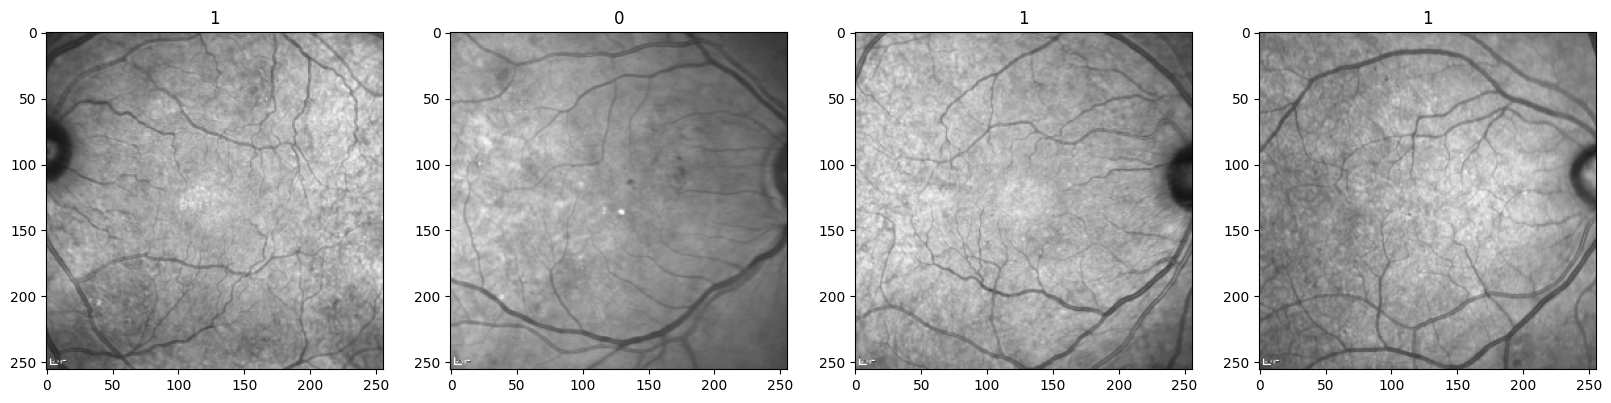

In [32]:
#Setting the subplot formatting to 4columns of images and 20 by 20 pixels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
#loop four times and get images
for idx, img in enumerate(batch[0][:4]):
  #plot the image using a specific subplot (ax)
  ax[idx].imshow(img.astype(int))
  #Appending the image label as the plot title
  ax[idx].title.set_text(batch[1][idx])

In [33]:
ax

array([<Axes: title={'center': '1'}>, <Axes: title={'center': '0'}>,
       <Axes: title={'center': '1'}>, <Axes: title={'center': '1'}>],
      dtype=object)

In [69]:
batch[0].shape

(15, 256, 256, 3)

In [70]:
batch[1]

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int32)

In [38]:
# def scale_images(data):
#   image = data['image']
#   return image/255

In [61]:
# import numpy as np
# import tensorflow as tp
# from PIL import Image

# def scale_images(data):
#   image, label = data # Unpack the image and label
#   image = tf.image.convert_image_dtype(image, dtype=tf.float32) # Convert SymbolicTensor to float32
#   if isinstance(image, np.ndarray):
#     scaled_image = image / 255.0  # Ensure floating-point division for accuracy
#       # Handle PIL Images (if applicable in your use case)
#   elif isinstance(image, Image.Image):
#     image = np.array(image)  # Convert PIL Image to NumPy array for scaling
#     scaled_image = image / 255.0
#   else:
#     raise TypeError("Unsupported image data type:", type(image))
#   return scaled_image, label # Return the scaled image and the corresponding label

In [63]:
def scale_images(data):
  return data.map(lambda x,y: (x/255,y))

In [64]:
#reload the dataset
ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Project1', validation_split=0.2, subset='training', seed = 100)
# running the dataset through the scale_images preprocessing steps
ds = ds.map(lambda x,y: (x/255,y))
#Cache the dataset for that batch
ds = ds.cache()
#Shuffling
ds = ds.shuffle(100)
ds = ds.batch(4)
#reduces the likelihood of bottlenecking
ds = ds.prefetch(40)

Found 58 files belonging to 2 classes.
Using 47 files for training.


In [79]:
#Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
#Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,BatchNormalization, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D, Activation

In [155]:
#for images of 256, 256, 3
def build_generator():
  model =  Sequential()
  #Takes in random values and reshapes it to 16*16*256
  #Beginnings of a generated image
  model.add(Dense(16*16*256, input_dim=256))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((16,16,256)))

  #Upsampling to 32*32
  model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(0.2))
  # Upsample to 64x64
  model.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(0.2))

    # Upsample to 128x128
  model.add(Conv2DTranspose(32, kernel_size=4, strides=2, padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(0.2))

    # Upsample to 256x256
  model.add(Conv2DTranspose(16, kernel_size=4, strides=2, padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(0.2))

  #Final layer to get desired 256,256,3
  model.add(Conv2DTranspose(3, kernel_size=4, strides=1, padding='same', activation='sigmoid'))  # Use stride of 1 to avoid further upsampling
  model.add(Activation('tanh'))  # Use 'tanh' activation for normalized pixel values (-1 to 1)
  return model

In [156]:
generator = build_generator()

In [157]:
generator.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 65536)             16842752  
                                                                 
 leaky_re_lu_81 (LeakyReLU)  (None, 65536)             0         
                                                                 
 reshape_12 (Reshape)        (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose_48 (Conv2  (None, 32, 32, 128)       524416    
 DTranspose)                                                     
                                                                 
 batch_normalization_44 (Ba  (None, 32, 32, 128)       512       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_82 (LeakyReLU)  (None, 32, 32, 128)     

In [163]:
img = generator.predict(np.random.randn(4,256,1))
img

1/1 [==============================] - 0s 231ms/step


array([[[[0.46214944, 0.46208072, 0.46209735],
         [0.46203813, 0.4621163 , 0.462181  ],
         [0.46212047, 0.4621247 , 0.46221796],
         ...,
         [0.46208414, 0.46205503, 0.46214107],
         [0.46207142, 0.46208724, 0.46217367],
         [0.46207485, 0.46207848, 0.46218893]],

        [[0.46213034, 0.46218523, 0.46207955],
         [0.4621265 , 0.46215206, 0.46216533],
         [0.46212667, 0.4620989 , 0.4622391 ],
         ...,
         [0.4621041 , 0.46202537, 0.462177  ],
         [0.462215  , 0.46216553, 0.462268  ],
         [0.46214864, 0.4619599 , 0.46215546]],

        [[0.46214646, 0.46212554, 0.46228448],
         [0.46205455, 0.46211395, 0.46213594],
         [0.46224317, 0.46207282, 0.4622045 ],
         ...,
         [0.4622267 , 0.46196792, 0.4621803 ],
         [0.46221986, 0.46198   , 0.46212515],
         [0.46200094, 0.4620975 , 0.46214637]],

        ...,

        [[0.46214724, 0.46217966, 0.46217105],
         [0.46216637, 0.4622569 , 0.46217936]

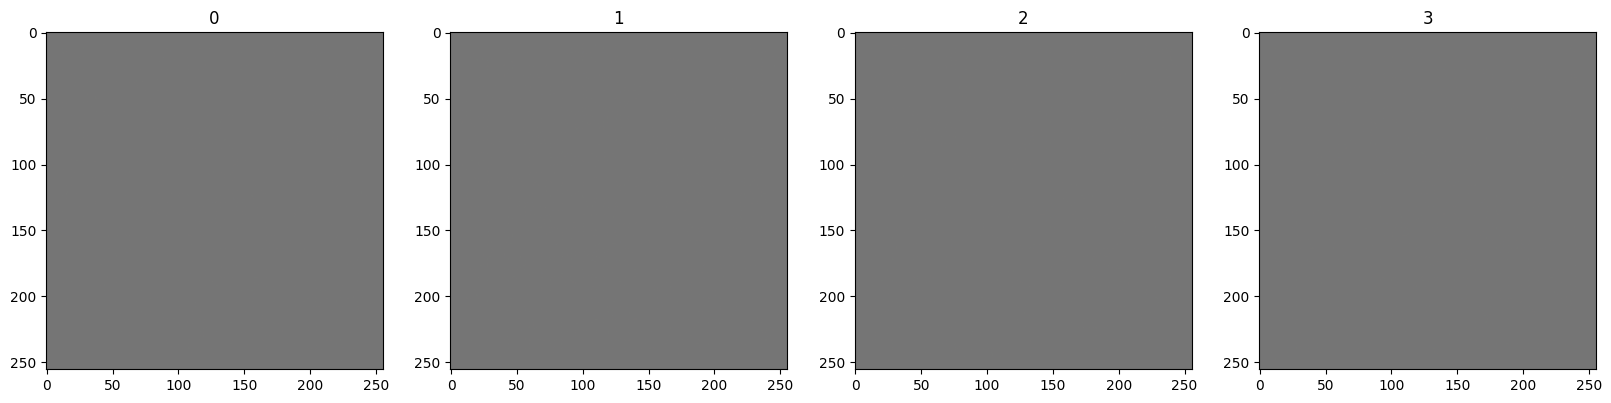

In [126]:
#Setting the subplot formatting to 4columns of images and 20 by 20 pixels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
#loop four times and get images
for idx, img in enumerate(img):
  #plot the image using a specific subplot (ax)
  ax[idx].imshow(np.squeeze(img))
  #Appending the image label as the plot title
  ax[idx].title.set_text(idx)

In [149]:
def build_discriminator():
  model=Sequential()

  #First Conv Block
  model.add(Conv2D(32,5, input_shape = (256,256,3)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Second Conv Block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Third Conv Block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Fourth Conv Block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation="sigmoid"))

  return model

In [150]:
discriminator = build_discriminator()

In [151]:
discriminator.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 252, 252, 32)      2432      
                                                                 
 leaky_re_lu_77 (LeakyReLU)  (None, 252, 252, 32)      0         
                                                                 
 dropout_21 (Dropout)        (None, 252, 252, 32)      0         
                                                                 
 conv2d_26 (Conv2D)          (None, 248, 248, 64)      51264     
                                                                 
 leaky_re_lu_78 (LeakyReLU)  (None, 248, 248, 64)      0         
                                                                 
 dropout_22 (Dropout)        (None, 248, 248, 64)      0         
                                                                 
 conv2d_27 (Conv2D)          (None, 244, 244, 128)   

In [159]:
discriminator.predict(img)

1/1 [==============================] - 9s 9s/step


array([[0.50147426],
       [0.50147796],
       [0.5014834 ],
       [0.5014746 ]], dtype=float32)

In [161]:
#discriminator.predict(np.expand_dims(img,0))